In [1]:
!wget https://raw.githubusercontent.com/Natasquad-Hack/NataSquad-AI-Hackathon/main/1_Machine_Learning/2_Time_Series_Forecasting/archive.zip

--2023-07-31 03:51:03--  https://raw.githubusercontent.com/Natasquad-Hack/NataSquad-AI-Hackathon/main/1_Machine_Learning/2_Time_Series_Forecasting/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18736648 (18M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  17.87M  --.-KB/s    in 0.1s    

2023-07-31 03:51:04 (169 MB/s) - ‘archive.zip’ saved [18736648/18736648]



In [2]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: historic_demand_2009_2023.csv  
  inflating: historic_demand_2009_2023_noNaN.csv  
  inflating: historic_demand_year_2009.csv  
  inflating: historic_demand_year_2010.csv  
  inflating: historic_demand_year_2011.csv  
  inflating: historic_demand_year_2012.csv  
  inflating: historic_demand_year_2013.csv  
  inflating: historic_demand_year_2014.csv  
  inflating: historic_demand_year_2015.csv  
  inflating: historic_demand_year_2016.csv  
  inflating: historic_demand_year_2017.csv  
  inflating: historic_demand_year_2018.csv  
  inflating: historic_demand_year_2019.csv  
  inflating: historic_demand_year_2020.csv  
  inflating: historic_demand_year_2021.csv  
  inflating: historic_demand_year_2022.csv  
  inflating: historic_demand_year_2023.csv  


# Modelo de Regresion Lineal

In [31]:
# 1. Cargar y explorar los datos
import pandas as pd

df = pd.read_csv('/content/historic_demand_2009_2023_noNaN.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250194 entries, 0 to 250193
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   settlement_date            250194 non-null  object
 1   settlement_period          250194 non-null  int64 
 2   period_hour                250194 non-null  object
 3   nd                         250194 non-null  int64 
 4   tsd                        250194 non-null  int64 
 5   england_wales_demand       250194 non-null  int64 
 6   embedded_wind_generation   250194 non-null  int64 
 7   embedded_wind_capacity     250194 non-null  int64 
 8   embedded_solar_generation  250194 non-null  int64 
 9   embedded_solar_capacity    250194 non-null  int64 
 10  non_bm_stor                250194 non-null  int64 
 11  pump_storage_pumping       250194 non-null  int64 
 12  ifa_flow                   250194 non-null  int64 
 13  ifa2_flow                  250194 non-null  

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
count,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000
mean,24.497242,31830.252924,33281.000795,28955.719937,1214.111070,4216.416317,798.006271,7775.123264,7.423176,320.470307,919.002234,11.460115,542.995539,-107.266953,-25.317638,151.336183,0.022638
std,13.851967,7772.990497,7568.625622,7046.881689,926.112486,1924.315223,1596.145771,5480.305258,41.288693,544.056120,1093.595345,308.067249,507.545181,223.066403,251.334752,388.191533,0.148748
min,1.000000,13367.000000,16629.000000,0.000000,0.000000,1403.000000,0.000000,0.000000,-24.000000,0.000000,-2056.000000,-1030.000000,-1215.000000,-505.000000,-585.000000,-1022.000000,0.000000
25%,12.000000,25620.000000,27268.000000,23298.000000,522.000000,2085.000000,0.000000,1829.000000,0.000000,8.000000,206.000000,0.000000,0.000000,-251.000000,-128.000000,0.000000,0.000000
50%,24.000000,31264.000000,32484.000000,28421.000000,973.000000,4163.000000,0.000000,9300.000000,0.000000,12.000000,1247.000000,0.000000,767.000000,-119.000000,0.000000,0.000000,0.000000
75%,36.000000,37540.000000,38704.000000,34176.000000,1651.000000,6192.000000,736.000000,13080.000000,0.000000,465.000000,1899.000000,0.000000,994.000000,46.000000,7.000000,0.000000,0.000000
max,48.000000,59095.000000,60147.000000,53325.000000,5354.000000,6574.000000,9830.000000,13861.000000,893.000000,2019.000000,2066.000000,1016.000000,1143.000000,499.000000,504.000000,1033.000000,1.000000


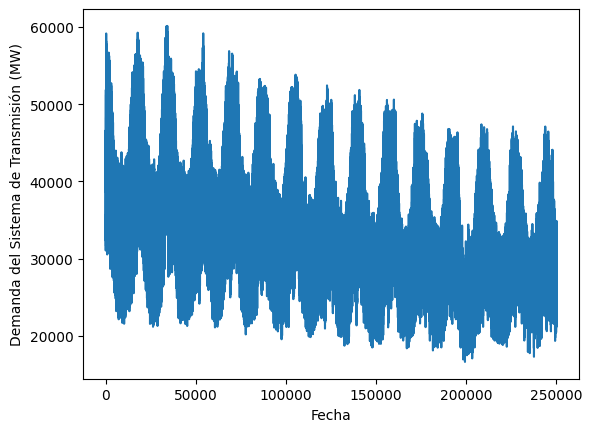

In [32]:
# Gráficos
import matplotlib.pyplot as plt

# Visualizar la serie temporal
plt.plot(df['tsd'])
plt.xlabel('Fecha')
plt.ylabel('Demanda del Sistema de Transmisión (MW)')
plt.show()


In [33]:
# 2. Preprocesamiento
from sklearn.preprocessing import StandardScaler

df['date'] = pd.to_datetime(df['settlement_date'])
df = df.set_index('date')

scaler = StandardScaler()
df[['tsd']] = scaler.fit_transform(df[['tsd']])

df['period_hour'] = pd.to_timedelta(df['period_hour'])
df['period_hour'] = df['period_hour'].dt.total_seconds()

In [34]:
# 3. Dividir datos
train = df.loc[df.index < '2023-01-01']
test = df.loc[df.index >= '2023-01-01']

In [35]:
# 4. Modelos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_train = train.drop('tsd', axis=1)
X_train = X_train.drop('settlement_date', axis=1)
y_train = train['tsd']

lr_model = LinearRegression()
lr_model.fit(X=X_train, y=y_train.astype(float))

scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print(scores)

[0.99689787 0.9970051  0.99839275 0.99433832 0.95269693]


In [36]:
# Conjuntos para testear el modelo
X_test = test.drop('tsd', axis=1)
X_test = X_test.drop('settlement_date', axis=1)

y_test = test['tsd']

MSE: 0.008875494061472847
RMSE: 0.09420984057662367
MAE: 0.07986858028594539


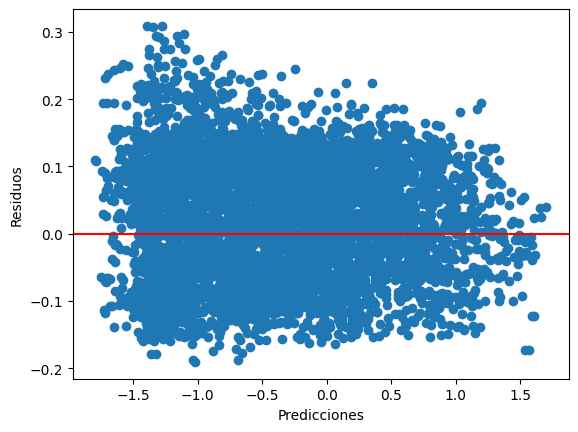

In [37]:
# Realizar predicciones en un conjunto de datos de prueba
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando métricas de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# Realizar un análisis de residuos
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

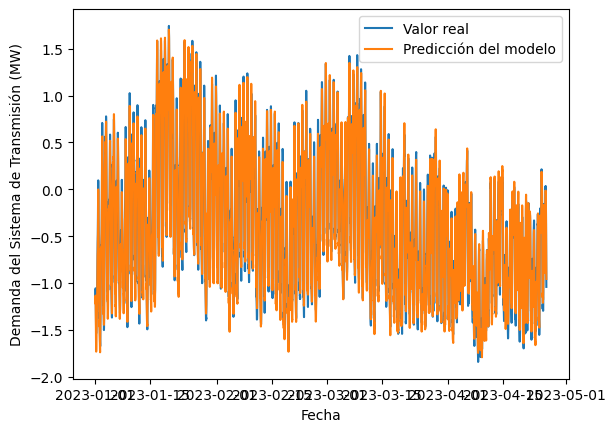

In [39]:
import matplotlib.pyplot as plt

# Graficar los valores reales y las predicciones del modelo
plt.plot(y_test.index, y_test, label='Valor real')
plt.plot(y_test.index, y_pred, label='Predicción del modelo')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Demanda del Sistema de Transmisión (MW)')
plt.show()

# Modelo ARIMA

1. Cargar los datos históricos en un DataFrame de Pandas:

In [17]:
import pandas as pd

# Cargar los datos históricos
data = pd.read_csv('/content/historic_demand_2009_2023_noNaN.csv', parse_dates=['settlement_date'])
data.set_index('settlement_date', inplace=True)

# Seleccionar la columna de la demanda del sistema de transmisión (TSD)
tsd = data['tsd']

2. Realizar un análisis exploratorio de datos y visualizar la serie temporal para entender mejor las características de los datos:

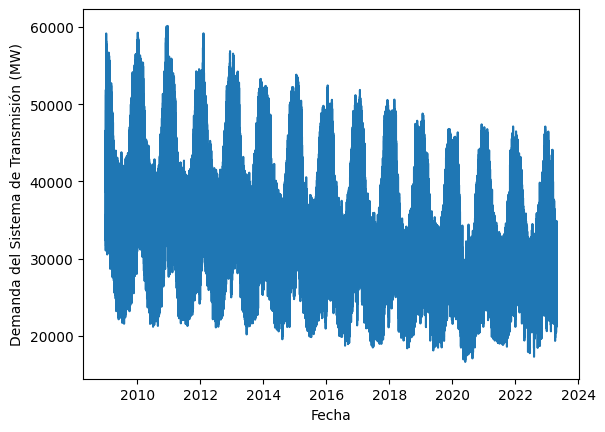

In [18]:
import matplotlib.pyplot as plt

# Visualizar la serie temporal
plt.plot(tsd)
plt.xlabel('Fecha')
plt.ylabel('Demanda del Sistema de Transmisión (MW)')
plt.show()

3. Realizar una prueba de estacionariedad para determinar si la serie temporal es estacionaria o no. Si no es estacionaria, se debe aplicar una transformación para hacerla estacionaria. Puede utilizar una prueba de Dickey-Fuller aumentada (ADF) para esto:

In [19]:
from statsmodels.tsa.stattools import adfuller

# Realizar una prueba de Dickey-Fuller aumentada (ADF)
result = adfuller(tsd)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.743016
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Si el valor p es menor que 0.05, se puede rechazar la hipótesis nula de que la serie temporal es no estacionaria. De lo contrario, la serie temporal no es estacionaria y se debe aplicar una transformación.

4. Aplicar una transformación a la serie temporal si es necesario. Una transformación común es la diferenciación de la serie temporal. Puede aplicar la diferenciación de primer orden utilizando la función diff() de Pandas:

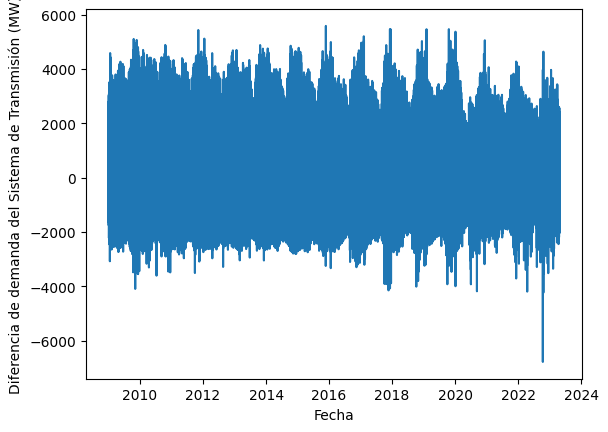

In [20]:
# Aplicar la diferenciación de primer orden
tsd_diff = tsd.diff().dropna()

# Visualizar la serie temporal diferenciada
plt.plot(tsd_diff)
plt.xlabel('Fecha')
plt.ylabel('Diferencia de demanda del Sistema de Transmisión (MW)')
plt.show()

5. Determinar los valores óptimos de los parámetros AR, I y MA del modelo ARIMA utilizando técnicas como la autocorrelación y la autocorrelación parcial. Puede utilizar las funciones plot_acf() y plot_pacf() de statsmodels para visualizar estos gráficos:

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


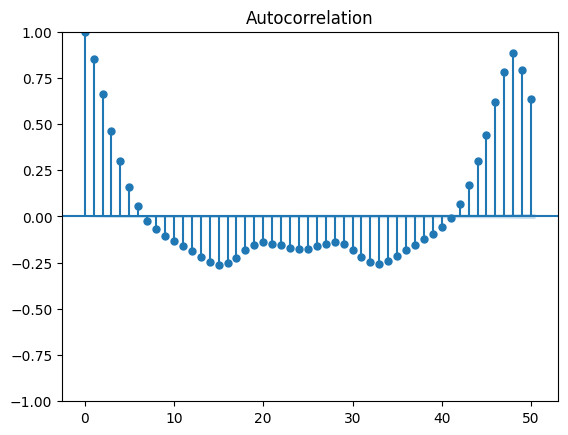

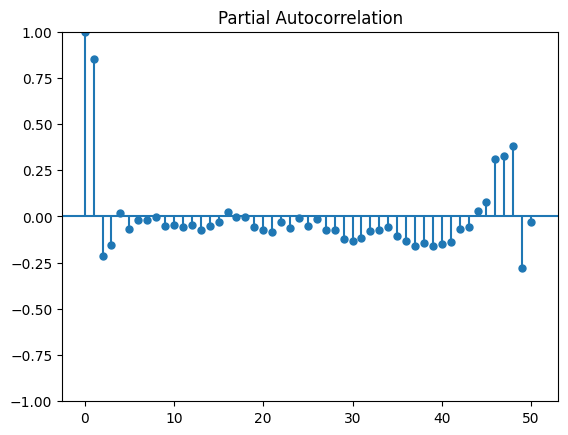

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualizar la autocorrelación y la autocorrelación parcial de la serie temporal diferenciada
plot_acf(tsd_diff, lags=50)
plot_pacf(tsd_diff, lags=50)
plt.show()

A partir de estos gráficos, puede determinar los valores óptimos de los parámetros AR, I y MA. Por ejemplo, si hay una autocorrelación significativa en el retraso 1 y una autocorrelación parcial significativa en el retraso 1, puede utilizar los valores (1,1,1) para los parámetros AR, I y MA.

6. Ajustar el modelo ARIMA utilizando los valores óptimos de los parámetros:

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA
p = 1  # Orden del modelo AR
d = 1  # Orden de diferenciación
q = 1  # Orden del modelo MA
arima_model = ARIMA(tsd, order=(p, d, q))
arima_model_fit = arima_model.fit()

# Imprimir el resumen del modelo
print(arima_model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    tsd   No. Observations:               250194
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1925427.651
Date:                Mon, 31 Jul 2023   AIC                        3850861.302
Time:                        07:26:50   BIC                        3850892.592
Sample:                             0   HQIC                       3850870.423
                             - 250194                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8028      0.001    948.547      0.000       0.801       0.804
ma.L1          0.1767      0.002    109.165      0.000       0.174       0.180
sigma2      2.838e+05    499.474    568.102      0.0

7. Realizar predicciones en los datos de prueba utilizando el modelo ARIMA ajustado. Puede utilizar el método predict() de statsmodels para realizar predicciones:

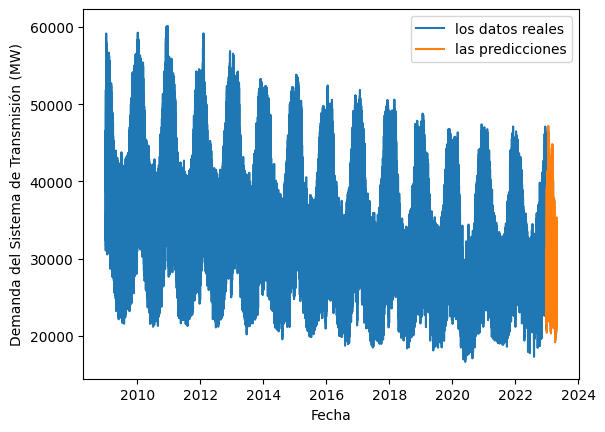

In [23]:
# Realizar predicciones en los datos de prueba
start_date = '2023-01-01'
end_date = '2023-04-25 23:30:00'
tsd_pred = arima_model_fit.predict(start=start_date, end=end_date, typ='levels')

# Visualizar las predicciones y los datos reales
plt.plot(tsd)
plt.plot(tsd_pred)
plt.xlabel('Fecha')
plt.ylabel('Demanda del Sistema de Transmisión (MW)')
plt.legend(['los datos reales', 'las predicciones'])
plt.show()

8. Evaluar el rendimiento del modelo utilizando métricas como el error cuadrático medio (MSE) y el error absoluto medio (MAE):

In [24]:
# Calcular MSE, RMSE y MAE
mse = mean_squared_error(tsd[start_date:end_date], tsd_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(tsd[start_date:end_date], tsd_pred)
print('MSE: %.2f' % mse)
print('RMSE: %.2f' % rmse)
print('MAE: %.2f' % mae)

MSE: 287717.84
RMSE: 536.39
MAE: 404.30


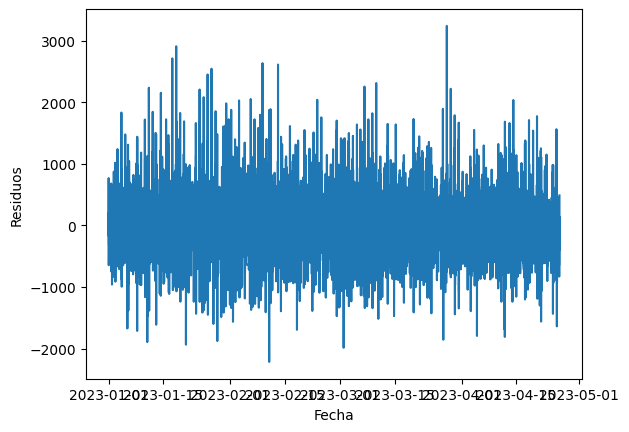

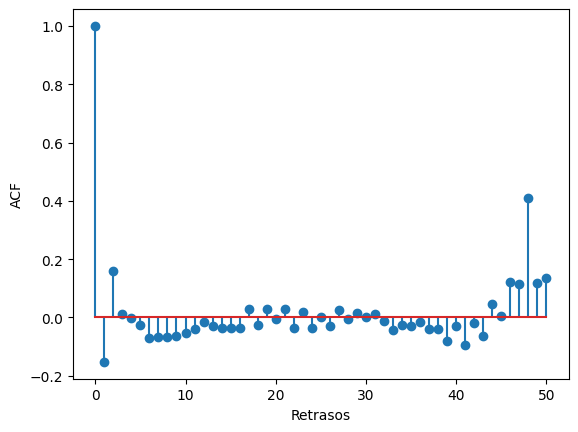

In [28]:
# Analizar los residuos
from statsmodels.tsa.stattools import acf
# Calcular los residuos
residuals = tsd[start_date:end_date] - tsd_pred

# Visualizar los residuos
plt.plot(residuals)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.show()

# Calcular la función de autocorrelación de los residuos
acf_resid = acf(residuals, nlags=50)
plt.stem(acf_resid)
plt.xlabel('Retrasos')
plt.ylabel('ACF')
plt.show()

In [26]:
# Comparar con la media y la desviación estándar
mean = np.mean(tsd[start_date:end_date])
std = np.std(tsd[start_date:end_date])
print('Media: %.2f' % mean)
print('Desviación estándar: %.2f' % std)
print('MSE en comparación con la media: %.2f' % (mse / (mean ** 2)))
print('MAE en comparación con la desviación estándar: %.2f' % (mae / std))

Media: 30573.53
Desviación estándar: 5573.83
MSE en comparación con la media: 0.00
MAE en comparación con la desviación estándar: 0.07


# Conclusiones
Al comparar los dos modelos, podemos ver que el modelo de regresión lineal tiene un MSE y un MAE más bajos que el modelo ARIMA. Esto sugiere que el modelo de regresión lineal puede ser más preciso en la predicción de la demanda de energía. Sin embargo, es importante tener en cuenta que ambos modelos pueden tener diferentes fortalezas y debilidades en diferentes situaciones, por lo que es importante considerar qué modelo es el más adecuado para la tarea específica.

En los gráficos resultantes, podemos ver que las predicciones del modelo de regresión lineal y del modelo ARIMA siguen la misma tendencia general de los datos reales, pero hay algunas diferencias en las predicciones. El modelo de regresión lineal parece seguir las fluctuaciones de los datos con más detalle, mientras que el modelo ARIMA parece suavizar las fluctuaciones y producir predicciones más estables y consistentes. Es importante tener en cuenta que la visualización de los resultados puede ser una herramienta útil para comprender mejor las diferencias entre los modelos y evaluar su rendimiento.